# <b>Theoreticl Questions<b>

**Q1:**
<br>
To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim

A1:

**Q2:**
<br>
T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**A2:** 

**Classifier1**
<br>
Pros- easy to visualize data,less weights to train,
<br>
Cons-selected feature may not be the best features,
    
**Classifier2**
<br>
Pros-
<br>
Cons-May contain redundant features

**Q3:**
<br>
A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**A3:**
<br>


**Q4:**
<br>
What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

**A4:** 

# <b>Coding Assignment<b>

In [1]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [47]:
#T1D data 
df_raw = pd.read_csv("HW2_data.csv")
df = df_raw.copy()

#preprocessing
#converting family history to Yes/No
df['Family History'] = df['Family History'].map({1: 'Yes', 0 : 'No'})
#finding empty cells in dataframe
row,col = np.where(pd.isnull(df))
for i,j in zip(row,col):
    df.iloc[i,j] = np.nan



In [48]:
# train test split
# feature columns
features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17]
X = df.iloc[:,features]
# T1D prediction
y = df.iloc[:,16]
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10, stratify=y)

<b>Data visualization and exploration<b>

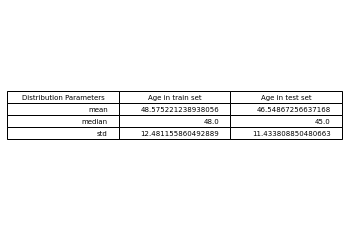

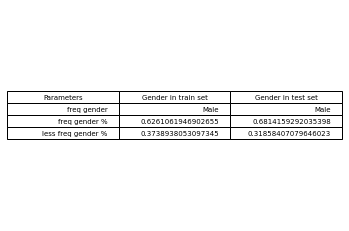

In [49]:
#Distribution in train and test set

fig1, ax1 =plt.subplots(1,1)
st1 = X_train.iloc[:,0].describe()
st2 = x_test.iloc[:,0].describe()
data = [['mean',st1['mean'],st2['mean']],['median',st1['50%'],st2['50%']],['std',st1['std'],st2['std']]]

column_labels=["Distribution Parameters", "Age in train set", "Age in test set"]
ax1.axis('tight')
ax1.axis('off')
ax1.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()

fig2, ax2 =plt.subplots(1,1)
st1 = X_train.iloc[:,1].describe()
st2 = x_test.iloc[:,1].describe()
data = [['freq gender',st1['top'],st2['top']],['freq gender %',st1['freq']/st1['count'],st2['freq']/st2['count']],['less freq gender %',1-st1['freq']/st1['count'],1-st2['freq']/st2['count']]]
column_labels=["Parameters", "Gender in train set", "Gender in test set"]
ax2.axis('tight')
ax2.axis('off')
ax2.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()


    
    


In [56]:
dict_stat_train={}
dict_stat_test={} 
for f in X_train.columns:
    if f == 'Age' or f == 'Gender':
        continue
    count = X_train[f].describe(exclude=[np.number])['count']
    top = X_train[f].describe(exclude=[np.number])['top']
    freq = X_train[f].describe(exclude=[np.number])['freq']
    if top == 'Yes':
        dict_stat_train['%  Yes in ' + str(f)]=freq/count
    else:
        dict_stat_train['%  Yes in ' + str(f)]=1-freq/count
    
    count = x_test[f].describe(exclude=[np.number])['count']
    top = x_test[f].describe(exclude=[np.number])['top']
    freq = x_test[f].describe(exclude=[np.number])['freq']
    if top == 'Yes':
        dict_stat_test['%  Yes in ' + str(f)]=freq/count
    else:
        dict_stat_test['%  Yes in ' + str(f)]=1-freq/count

print('Train set stats')
print(dict_stat_train)
print('Test set stats')
print(dict_stat_test)

    

Train set stats
{'%  Yes in Increased Urination': 0.4845132743362832, '%  Yes in Increased Thirst': 0.4416475972540046, '%  Yes in Sudden Weight Loss': 0.4071588366890381, '%  Yes in Weakness': 0.5575221238938053, '%  Yes in Increased Hunger': 0.44318181818181823, '%  Yes in Genital Thrush': 0.20861678004535145, '%  Yes in Visual Blurring': 0.4424778761061947, '%  Yes in Itching': 0.47619047619047616, '%  Yes in Irritability': 0.2256637168141593, '%  Yes in Delayed Healing': 0.4690265486725663, '%  Yes in Partial Paresis': 0.422566371681416, '%  Yes in Muscle Stiffness': 0.363013698630137, '%  Yes in Hair Loss': 0.3584070796460177, '%  Yes in Obesity': 0.17035398230088494, '%  Yes in Family History': 0.48672566371681414}
Test set stats
{'%  Yes in Increased Urination': 0.47787610619469023, '%  Yes in Increased Thirst': 0.4537037037037037, '%  Yes in Sudden Weight Loss': 0.42201834862385323, '%  Yes in Weakness': 0.6283185840707964, '%  Yes in Increased Hunger': 0.4553571428571429, '%  

If training and test datasets are not sampled from the same distribution, there is an imbalance between them then training  cannot be used to predict anything about the test dataset in a usable manner.
<br>
This problem is known as **DataShift**
<br>
We can treat DataShift by:
<br>
1. Dropping of drifting features
2. Importance weight using Density Ratio Estimation

In [ ]:
# relationship between feature and label

